In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('data capstone projek bangkit 23.xlsx')
df.head()

,Suhu udara (rata-rata (C)),Kelembaban udara (rata-rata %),curah hujan minim (mm3),curah hujan max (mm3),Ketinggian\n(dataran rendah 0<200) (dataran tinggi >200),Tanaman,Daerah Penanaman
0,26.4,76.5,21,50,90.0,"cabai, bawang merah","Pacitan, ponorogo, tulungagung, blitar, lumaja..."
1,26.4,76.5,21,50,505.0,bawang putih,"Trenggalek, malang, bondowoso, ngawi, gresik, ..."
2,29.6,74.0,51,100,90.0,"cabai,Bawang merah, bawang putih","Pacitan, ponorogo, tulungagung, blitar, lumaja..."
3,29.6,74.0,51,100,1100.0,"cabai, kubis","Trenggalek, malang, bondowoso, ngawi, gresik, ..."
4,28.9,74.5,101,150,2.8,Cabai,"Pacitan, ponorogo, tulungagung, blitar, lumaja..."


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 7 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Suhu udara (rata-rata (C))                               288 non-null    float64
 1   Kelembaban udara (rata-rata %)                           288 non-null    float64
 2   curah hujan minim (mm3)                                  288 non-null    int64  
 3   curah hujan max (mm3)                                    288 non-null    int64  
 4   Ketinggian
(dataran rendah 0<200) (dataran tinggi >200)  288 non-null    float64
 5   Tanaman                                                  288 non-null    object 
 6   Daerah Penanaman                                         288 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 15.9+ KB


In [3]:
df.describe()

,Suhu udara (rata-rata (C)),Kelembaban udara (rata-rata %),curah hujan minim (mm3),curah hujan max (mm3),Ketinggian\n(dataran rendah 0<200) (dataran tinggi >200)
count,288.000000,288.000000,288.000000,288.000000,288.000000
mean,28.059722,72.369792,104.680556,159.375000,366.040278
std,1.068218,5.952737,65.126481,85.635308,365.949794
min,24.300000,55.000000,21.000000,50.000000,2.800000
25%,27.475000,68.500000,51.000000,100.000000,50.000000
50%,28.200000,73.500000,101.000000,150.000000,205.500000
75%,28.800000,76.500000,151.000000,200.000000,637.000000
max,30.500000,84.000000,201.000000,300.000000,1100.000000


### Preprocess suhu udara

In [4]:
avg_temp_df = df.loc[:, ['Suhu udara (rata-rata (C))']].rename(columns={'Suhu udara (rata-rata (C))': 'avg_temp'})
avg_temp_df.head()

,avg_temp
0,26.4
1,26.4
2,29.6
3,29.6
4,28.9


In [5]:
data = avg_temp_df['avg_temp'].values.tolist()
avg_temp_df['binned_avg_temp'] = pd.qcut(data, q=3).astype(str)
avg_temp_df.head()

,avg_temp,binned_avg_temp
0,26.4,"(24.299, 27.8]"
1,26.4,"(24.299, 27.8]"
2,29.6,"(28.6, 30.5]"
3,29.6,"(28.6, 30.5]"
4,28.9,"(28.6, 30.5]"


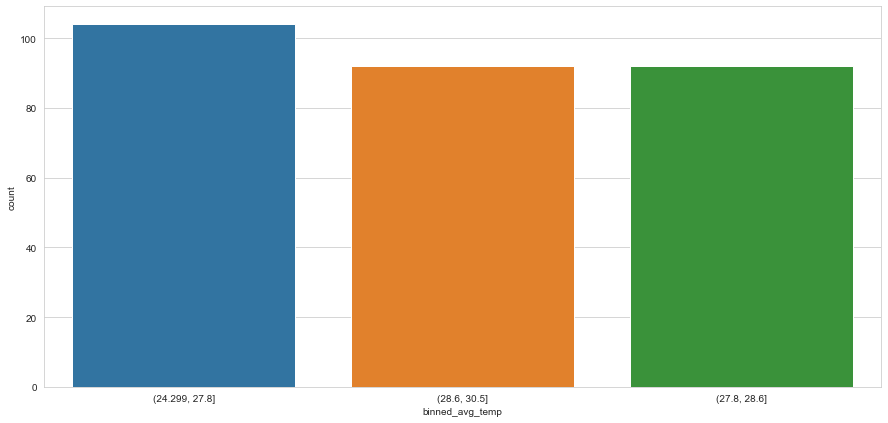

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 7)

sns.countplot(data=avg_temp_df, x='binned_avg_temp')
plt.show()

In [7]:
def create_avg_temp_classification(value):
    if value == '(24.299, 27.8]':
        return 'low_temp'
    elif value == '(27.8, 28.6]':
        return 'medium_temp'
    return 'high_temp'

In [8]:
avg_temp_df['avg_temp_classification'] = avg_temp_df['binned_avg_temp'].apply(create_avg_temp_classification)
avg_temp_df.head()

,avg_temp,binned_avg_temp,avg_temp_classification
0,26.4,"(24.299, 27.8]",low_temp
1,26.4,"(24.299, 27.8]",low_temp
2,29.6,"(28.6, 30.5]",high_temp
3,29.6,"(28.6, 30.5]",high_temp
4,28.9,"(28.6, 30.5]",high_temp


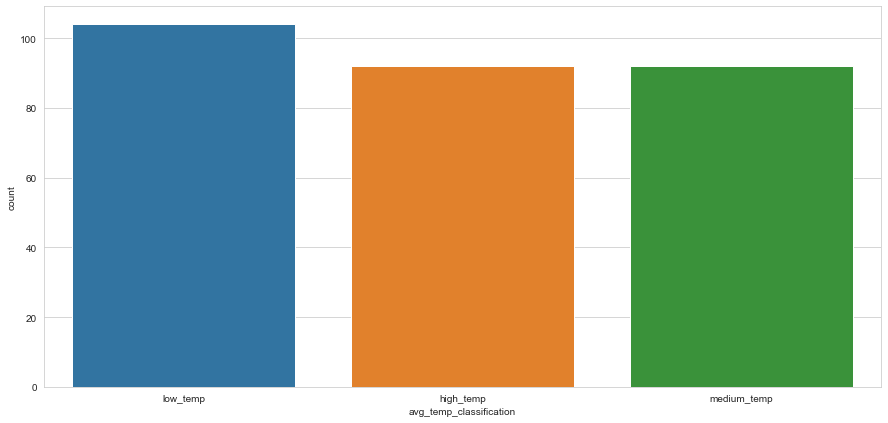

In [9]:
sns.countplot(data=avg_temp_df, x='avg_temp_classification')
plt.show()

### Preprocess kelembaban udara

In [10]:
percent_humid = df.loc[:, ['Kelembaban udara (rata-rata %)']] \
    .rename(columns={'Kelembaban udara (rata-rata %)': 'percent_humid'})
percent_humid.head()

,percent_humid
0,76.5
1,76.5
2,74.0
3,74.0
4,74.5


In [11]:
percent_humid.describe()

,percent_humid
count,288.000000
mean,72.369792
std,5.952737
min,55.000000
25%,68.500000
50%,73.500000
75%,76.500000
max,84.000000


In [12]:
# menurut https://www.higienis.com/blog/humidity-guide/#:~:text=Para%20ahli%20kesehatan%20merekomendasikan%20tingkat,%25%2C%20sebagai%20tingkat%20yang%20ideal.
def create_humidity_classification(value):
    if value < 45.:
        return 'too_dry'
    elif value >= 45. and value <= 65.:
        return 'ideal'
    return 'too_moist'

In [13]:
percent_humid['humid_classification'] = percent_humid['percent_humid'].apply(create_humidity_classification)
percent_humid.head()

,percent_humid,humid_classification
0,76.5,too_moist
1,76.5,too_moist
2,74.0,too_moist
3,74.0,too_moist
4,74.5,too_moist


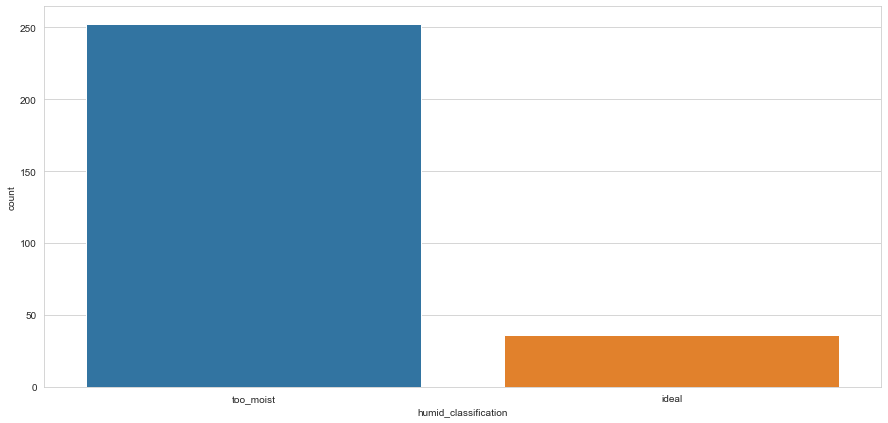

In [14]:
sns.countplot(data=percent_humid, x='humid_classification')
plt.show()

### Preprocess curah hujan

In [15]:
rainfall = df.loc[:, ['curah hujan minim (mm3)', 'curah hujan max (mm3)']] \
    .rename(columns={'curah hujan minim (mm3)': 'min_rainfall', 'curah hujan max (mm3)': 'max_rainfall'})
rainfall.head()

,min_rainfall,max_rainfall
0,21,50
1,21,50
2,51,100
3,51,100
4,101,150


In [16]:
rainfall.describe()

,min_rainfall,max_rainfall
count,288.000000,288.000000
mean,104.680556,159.375000
std,65.126481,85.635308
min,21.000000,50.000000
25%,51.000000,100.000000
50%,101.000000,150.000000
75%,151.000000,200.000000
max,201.000000,300.000000


In [17]:
rainfall['avg_rainfall'] = (rainfall['min_rainfall'] + rainfall['max_rainfall']) / 2
rainfall.head()

,min_rainfall,max_rainfall,avg_rainfall
0,21,50,35.5
1,21,50,35.5
2,51,100,75.5
3,51,100,75.5
4,101,150,125.5


In [18]:
rainfall.describe()

,min_rainfall,max_rainfall,avg_rainfall
count,288.000000,288.000000,288.000000
mean,104.680556,159.375000,132.027778
std,65.126481,85.635308,75.189141
min,21.000000,50.000000,35.500000
25%,51.000000,100.000000,75.500000
50%,101.000000,150.000000,125.500000
75%,151.000000,200.000000,175.500000
max,201.000000,300.000000,250.500000


In [19]:
# menurut https://bmkgsampali.net/normal-hujan-bulanan/#:~:text=Normal%20curah%20hujan%20ini%20terbagi,tinggi%20(%3E500%20mm).
def create_avg_temp_classification(value):
    if value > 0 and value < 100:
        return 'low_rainfall'
    elif value >= 100 and value < 300:
        return 'medium_rainfall'
    elif value >= 300 and value < 500:
        return 'high_rainfall'
    return 'very_high_rainfall'

In [20]:
rainfall['avg_rainfall_classification'] = rainfall['avg_rainfall'].apply(create_avg_temp_classification)
rainfall.head()

,min_rainfall,max_rainfall,avg_rainfall,avg_rainfall_classification
0,21,50,35.5,low_rainfall
1,21,50,35.5,low_rainfall
2,51,100,75.5,low_rainfall
3,51,100,75.5,low_rainfall
4,101,150,125.5,medium_rainfall


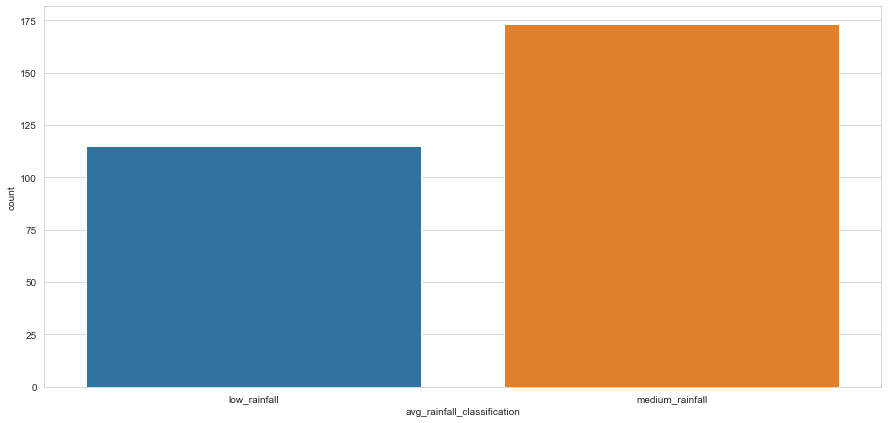

In [21]:
sns.countplot(data=rainfall, x='avg_rainfall_classification')
plt.show()

### Preprocess altitude

In [22]:
altitude = df.loc[:, ['Ketinggian\n(dataran rendah 0<200) (dataran tinggi >200)']] \
    .rename(columns={'Ketinggian\n(dataran rendah 0<200) (dataran tinggi >200)': 'altitude'})
altitude.head()

,altitude
0,90.0
1,505.0
2,90.0
3,1100.0
4,2.8


In [23]:
altitude.describe()

,altitude
count,288.000000
mean,366.040278
std,365.949794
min,2.800000
25%,50.000000
50%,205.500000
75%,637.000000
max,1100.000000


In [24]:
# menurut https://www.pelajaran.co.id/bentang-lahan-berdasarkan-ketinggian/
def create_avg_temp_classification(value):
    if value > 0 and value < 200:
        return 'lowland'
    elif value >= 200 and value < 500:
        return 'hill'
    return 'highland'

In [25]:
altitude['altitude_classification'] = altitude['altitude'].apply(create_avg_temp_classification)
altitude.head()

,altitude,altitude_classification
0,90.0,lowland
1,505.0,highland
2,90.0,lowland
3,1100.0,highland
4,2.8,lowland


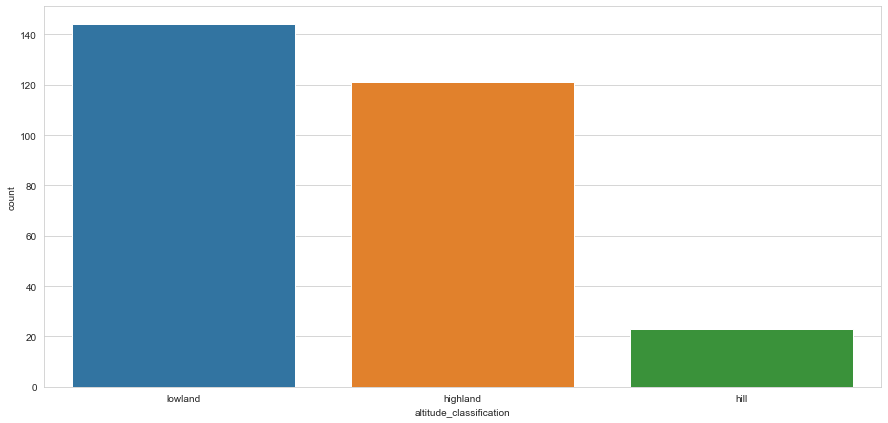

In [26]:
sns.countplot(data=altitude, x='altitude_classification')
plt.show()

### Preprocess tanaman

In [27]:
plant = df.loc[:, ['Tanaman']]
plant.head()

,Tanaman
0,"cabai, bawang merah"
1,bawang putih
2,"cabai,Bawang merah, bawang putih"
3,"cabai, kubis"
4,Cabai


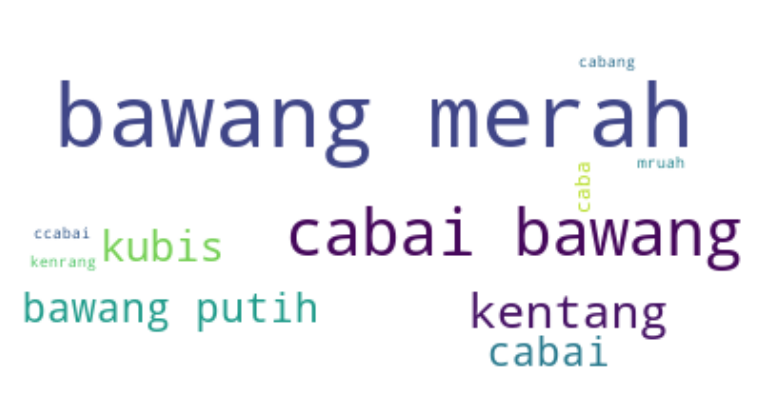

In [28]:
from wordcloud import WordCloud

data = ' '.join(plant['Tanaman'].values.tolist())
wordcloud = WordCloud(background_color='white').generate(data)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
import string
import re

def combine_plant(values):
    combined = ''
    for value in values.split(','):
        if len(value.split()) > 1:
            value = '-'.join(value.split())
        if value == 'caba':
            value = 'cabai'
        if value == 'ccabai':
            value = 'cabai'
        if value == 'mruah':
            value = 'bawang-merah'
        if value == 'cabang':
            value = 'cabai'
        if value == 'kenrang':
            value = 'kentang'
        combined += value + ' '
    return combined.strip()

In [30]:
plant['plant_clean'] = plant['Tanaman'].str.lower()
plant['plant_clean'] = plant['plant_clean'].apply(combine_plant)
plant.head()

,Tanaman,plant_clean
0,"cabai, bawang merah",cabai bawang-merah
1,bawang putih,bawang-putih
2,"cabai,Bawang merah, bawang putih",cabai bawang-merah bawang-putih
3,"cabai, kubis",cabai kubis
4,Cabai,cabai


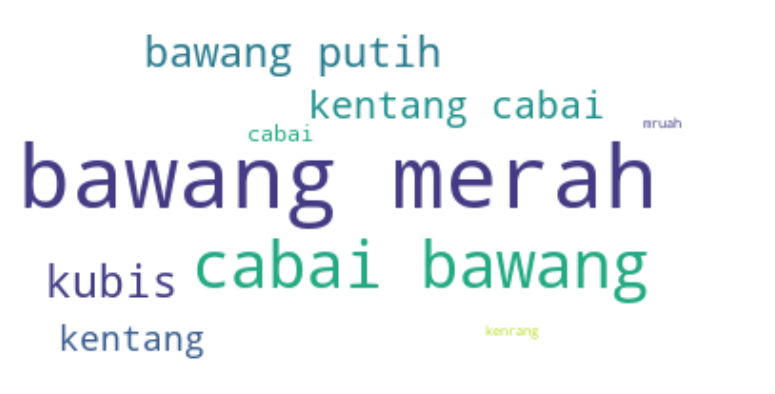

In [31]:
from wordcloud import WordCloud

data = ' '.join(plant['plant_clean'].values.tolist())
wordcloud = WordCloud(background_color='white').generate(data)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Preprocess daerah penanaman

In [32]:
planting_area = df.loc[:, ['Daerah Penanaman']]
planting_area.head()

,Daerah Penanaman
0,"Pacitan, ponorogo, tulungagung, blitar, lumaja..."
1,"Trenggalek, malang, bondowoso, ngawi, gresik, ..."
2,"Pacitan, ponorogo, tulungagung, blitar, lumaja..."
3,"Trenggalek, malang, bondowoso, ngawi, gresik, ..."
4,"Pacitan, ponorogo, tulungagung, blitar, lumaja..."


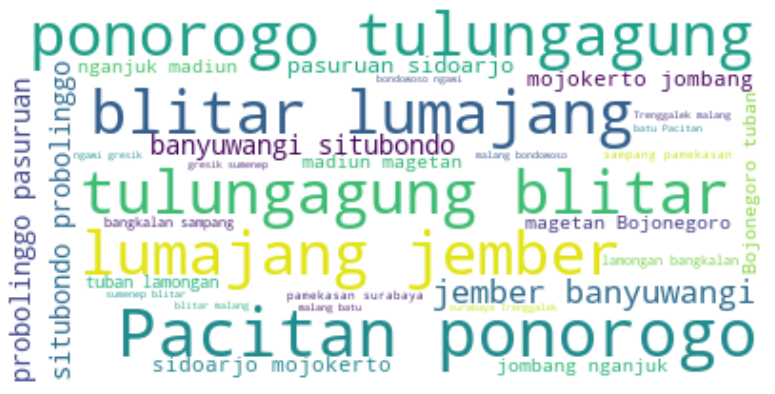

In [33]:
data = ' '.join(planting_area['Daerah Penanaman'].values.tolist())
wordcloud = WordCloud(background_color='white').generate(data)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [34]:
planting_area['Daerah Penanaman'] = planting_area['Daerah Penanaman'].str.lower()
planting_area.head()

,Daerah Penanaman
0,"pacitan, ponorogo, tulungagung, blitar, lumaja..."
1,"trenggalek, malang, bondowoso, ngawi, gresik, ..."
2,"pacitan, ponorogo, tulungagung, blitar, lumaja..."
3,"trenggalek, malang, bondowoso, ngawi, gresik, ..."
4,"pacitan, ponorogo, tulungagung, blitar, lumaja..."


In [35]:
def combine_area(values):
    combined = ''
    for value in values.split(','):
        combined += value + ' '
    return combined.strip()

In [36]:
planting_area['area_clean'] = planting_area['Daerah Penanaman'].apply(combine_area)
planting_area.head()

,Daerah Penanaman,area_clean
0,"pacitan, ponorogo, tulungagung, blitar, lumaja...",pacitan ponorogo tulungagung blitar lumaja...
1,"trenggalek, malang, bondowoso, ngawi, gresik, ...",trenggalek malang bondowoso ngawi gresik ...
2,"pacitan, ponorogo, tulungagung, blitar, lumaja...",pacitan ponorogo tulungagung blitar lumaja...
3,"trenggalek, malang, bondowoso, ngawi, gresik, ...",trenggalek malang bondowoso ngawi gresik ...
4,"pacitan, ponorogo, tulungagung, blitar, lumaja...",pacitan ponorogo tulungagung blitar lumaja...


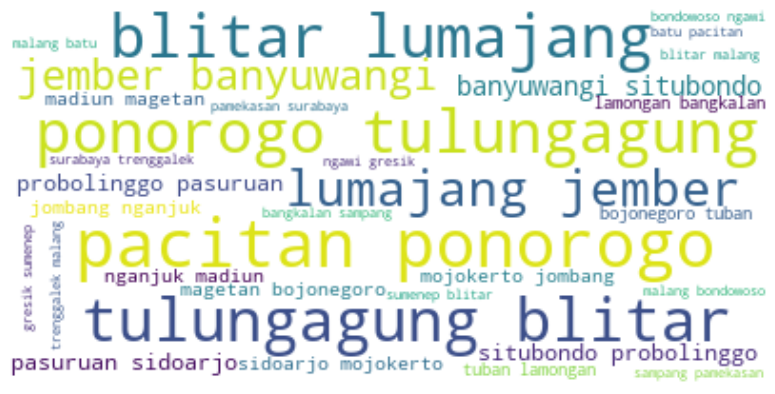

In [37]:
data = ' '.join(planting_area['area_clean'].values.tolist())
wordcloud = WordCloud(background_color='white').generate(data)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
pd.set_option('display.max_columns', None)

unique_city = list(set(data.split()))
for city in unique_city:
    planting_area[city] = city + '_no'
planting_area.head()

,Daerah Penanaman,area_clean,sidoarjo,ngawi,bojonegoro,ponorogo,lamongan,pacitan,sampang,blitar,pasuruan,jombang,surabaya,trenggalek,mojokerto,probolinggo,jember,sumenep,lumajang,pamekasan,batu,magetan,malang,bangkalan,situbondo,banyuwangi,madiun,bondowoso,gresik,nganjuk,tulungagung,tuban
0,"pacitan, ponorogo, tulungagung, blitar, lumaja...",pacitan ponorogo tulungagung blitar lumaja...,sidoarjo_no,ngawi_no,bojonegoro_no,ponorogo_no,lamongan_no,pacitan_no,sampang_no,blitar_no,pasuruan_no,jombang_no,surabaya_no,trenggalek_no,mojokerto_no,probolinggo_no,jember_no,sumenep_no,lumajang_no,pamekasan_no,batu_no,magetan_no,malang_no,bangkalan_no,situbondo_no,banyuwangi_no,madiun_no,bondowoso_no,gresik_no,nganjuk_no,tulungagung_no,tuban_no
1,"trenggalek, malang, bondowoso, ngawi, gresik, ...",trenggalek malang bondowoso ngawi gresik ...,sidoarjo_no,ngawi_no,bojonegoro_no,ponorogo_no,lamongan_no,pacitan_no,sampang_no,blitar_no,pasuruan_no,jombang_no,surabaya_no,trenggalek_no,mojokerto_no,probolinggo_no,jember_no,sumenep_no,lumajang_no,pamekasan_no,batu_no,magetan_no,malang_no,bangkalan_no,situbondo_no,banyuwangi_no,madiun_no,bondowoso_no,gresik_no,nganjuk_no,tulungagung_no,tuban_no
2,"pacitan, ponorogo, tulungagung, blitar, lumaja...",pacitan ponorogo tulungagung blitar lumaja...,sidoarjo_no,ngawi_no,bojonegoro_no,ponorogo_no,lamongan_no,pacitan_no,sampang_no,blitar_no,pasuruan_no,jombang_no,surabaya_no,trenggalek_no,mojokerto_no,probolinggo_no,jember_no,sumenep_no,lumajang_no,pamekasan_no,batu_no,magetan_no,malang_no,bangkalan_no,situbondo_no,banyuwangi_no,madiun_no,bondowoso_no,gresik_no,nganjuk_no,tulungagung_no,tuban_no
3,"trenggalek, malang, bondowoso, ngawi, gresik, ...",trenggalek malang bondowoso ngawi gresik ...,sidoarjo_no,ngawi_no,bojonegoro_no,ponorogo_no,lamongan_no,pacitan_no,sampang_no,blitar_no,pasuruan_no,jombang_no,surabaya_no,trenggalek_no,mojokerto_no,probolinggo_no,jember_no,sumenep_no,lumajang_no,pamekasan_no,batu_no,magetan_no,malang_no,bangkalan_no,situbondo_no,banyuwangi_no,madiun_no,bondowoso_no,gresik_no,nganjuk_no,tulungagung_no,tuban_no
4,"pacitan, ponorogo, tulungagung, blitar, lumaja...",pacitan ponorogo tulungagung blitar lumaja...,sidoarjo_no,ngawi_no,bojonegoro_no,ponorogo_no,lamongan_no,pacitan_no,sampang_no,blitar_no,pasuruan_no,jombang_no,surabaya_no,trenggalek_no,mojokerto_no,probolinggo_no,jember_no,sumenep_no,lumajang_no,pamekasan_no,batu_no,magetan_no,malang_no,bangkalan_no,situbondo_no,banyuwangi_no,madiun_no,bondowoso_no,gresik_no,nganjuk_no,tulungagung_no,tuban_no


In [39]:
def update_area_state(values, col):
    for value in values:
        if col == value:
            return value + '_yes'
    return col + '_no'

In [40]:
for city in unique_city:
    planting_area[city] = planting_area['area_clean'].apply(lambda x: update_area_state(x.split(), city))
planting_area.head()

,Daerah Penanaman,area_clean,sidoarjo,ngawi,bojonegoro,ponorogo,lamongan,pacitan,sampang,blitar,pasuruan,jombang,surabaya,trenggalek,mojokerto,probolinggo,jember,sumenep,lumajang,pamekasan,batu,magetan,malang,bangkalan,situbondo,banyuwangi,madiun,bondowoso,gresik,nganjuk,tulungagung,tuban
0,"pacitan, ponorogo, tulungagung, blitar, lumaja...",pacitan ponorogo tulungagung blitar lumaja...,sidoarjo_yes,ngawi_no,bojonegoro_yes,ponorogo_yes,lamongan_yes,pacitan_yes,sampang_yes,blitar_yes,pasuruan_yes,jombang_yes,surabaya_yes,trenggalek_no,mojokerto_yes,probolinggo_yes,jember_yes,sumenep_no,lumajang_yes,pamekasan_yes,batu_no,magetan_yes,malang_no,bangkalan_yes,situbondo_yes,banyuwangi_yes,madiun_yes,bondowoso_no,gresik_no,nganjuk_yes,tulungagung_yes,tuban_yes
1,"trenggalek, malang, bondowoso, ngawi, gresik, ...",trenggalek malang bondowoso ngawi gresik ...,sidoarjo_no,ngawi_yes,bojonegoro_no,ponorogo_no,lamongan_no,pacitan_no,sampang_no,blitar_yes,pasuruan_no,jombang_no,surabaya_no,trenggalek_yes,mojokerto_no,probolinggo_no,jember_no,sumenep_yes,lumajang_no,pamekasan_no,batu_yes,magetan_no,malang_yes,bangkalan_no,situbondo_no,banyuwangi_no,madiun_no,bondowoso_yes,gresik_yes,nganjuk_no,tulungagung_no,tuban_no
2,"pacitan, ponorogo, tulungagung, blitar, lumaja...",pacitan ponorogo tulungagung blitar lumaja...,sidoarjo_yes,ngawi_no,bojonegoro_yes,ponorogo_yes,lamongan_yes,pacitan_yes,sampang_yes,blitar_yes,pasuruan_yes,jombang_yes,surabaya_yes,trenggalek_no,mojokerto_yes,probolinggo_yes,jember_yes,sumenep_no,lumajang_yes,pamekasan_yes,batu_no,magetan_yes,malang_no,bangkalan_yes,situbondo_yes,banyuwangi_yes,madiun_yes,bondowoso_no,gresik_no,nganjuk_yes,tulungagung_yes,tuban_yes
3,"trenggalek, malang, bondowoso, ngawi, gresik, ...",trenggalek malang bondowoso ngawi gresik ...,sidoarjo_no,ngawi_yes,bojonegoro_no,ponorogo_no,lamongan_no,pacitan_no,sampang_no,blitar_yes,pasuruan_no,jombang_no,surabaya_no,trenggalek_yes,mojokerto_no,probolinggo_no,jember_no,sumenep_yes,lumajang_no,pamekasan_no,batu_yes,magetan_no,malang_yes,bangkalan_no,situbondo_no,banyuwangi_no,madiun_no,bondowoso_yes,gresik_yes,nganjuk_no,tulungagung_no,tuban_no
4,"pacitan, ponorogo, tulungagung, blitar, lumaja...",pacitan ponorogo tulungagung blitar lumaja...,sidoarjo_yes,ngawi_no,bojonegoro_yes,ponorogo_yes,lamongan_yes,pacitan_yes,sampang_yes,blitar_yes,pasuruan_yes,jombang_yes,surabaya_yes,trenggalek_no,mojokerto_yes,probolinggo_yes,jember_yes,sumenep_no,lumajang_yes,pamekasan_yes,batu_no,magetan_yes,malang_no,bangkalan_yes,situbondo_yes,banyuwangi_yes,madiun_yes,bondowoso_no,gresik_no,nganjuk_yes,tulungagung_yes,tuban_yes


In [41]:
final_df = pd.concat([
    avg_temp_df.loc[:, ['avg_temp_classification']],
    percent_humid.loc[:, ['humid_classification']],
    rainfall.loc[:, ['avg_rainfall_classification']],
    altitude.loc[:, ['altitude_classification']],
    planting_area.iloc[:, 1:],
    plant.loc[:, ['plant_clean']]
], axis=1)

final_df.head()

,avg_temp_classification,humid_classification,avg_rainfall_classification,altitude_classification,area_clean,sidoarjo,ngawi,bojonegoro,ponorogo,lamongan,pacitan,sampang,blitar,pasuruan,jombang,surabaya,trenggalek,mojokerto,probolinggo,jember,sumenep,lumajang,pamekasan,batu,magetan,malang,bangkalan,situbondo,banyuwangi,madiun,bondowoso,gresik,nganjuk,tulungagung,tuban,plant_clean
0,low_temp,too_moist,low_rainfall,lowland,pacitan ponorogo tulungagung blitar lumaja...,sidoarjo_yes,ngawi_no,bojonegoro_yes,ponorogo_yes,lamongan_yes,pacitan_yes,sampang_yes,blitar_yes,pasuruan_yes,jombang_yes,surabaya_yes,trenggalek_no,mojokerto_yes,probolinggo_yes,jember_yes,sumenep_no,lumajang_yes,pamekasan_yes,batu_no,magetan_yes,malang_no,bangkalan_yes,situbondo_yes,banyuwangi_yes,madiun_yes,bondowoso_no,gresik_no,nganjuk_yes,tulungagung_yes,tuban_yes,cabai bawang-merah
1,low_temp,too_moist,low_rainfall,highland,trenggalek malang bondowoso ngawi gresik ...,sidoarjo_no,ngawi_yes,bojonegoro_no,ponorogo_no,lamongan_no,pacitan_no,sampang_no,blitar_yes,pasuruan_no,jombang_no,surabaya_no,trenggalek_yes,mojokerto_no,probolinggo_no,jember_no,sumenep_yes,lumajang_no,pamekasan_no,batu_yes,magetan_no,malang_yes,bangkalan_no,situbondo_no,banyuwangi_no,madiun_no,bondowoso_yes,gresik_yes,nganjuk_no,tulungagung_no,tuban_no,bawang-putih
2,high_temp,too_moist,low_rainfall,lowland,pacitan ponorogo tulungagung blitar lumaja...,sidoarjo_yes,ngawi_no,bojonegoro_yes,ponorogo_yes,lamongan_yes,pacitan_yes,sampang_yes,blitar_yes,pasuruan_yes,jombang_yes,surabaya_yes,trenggalek_no,mojokerto_yes,probolinggo_yes,jember_yes,sumenep_no,lumajang_yes,pamekasan_yes,batu_no,magetan_yes,malang_no,bangkalan_yes,situbondo_yes,banyuwangi_yes,madiun_yes,bondowoso_no,gresik_no,nganjuk_yes,tulungagung_yes,tuban_yes,cabai bawang-merah bawang-putih
3,high_temp,too_moist,low_rainfall,highland,trenggalek malang bondowoso ngawi gresik ...,sidoarjo_no,ngawi_yes,bojonegoro_no,ponorogo_no,lamongan_no,pacitan_no,sampang_no,blitar_yes,pasuruan_no,jombang_no,surabaya_no,trenggalek_yes,mojokerto_no,probolinggo_no,jember_no,sumenep_yes,lumajang_no,pamekasan_no,batu_yes,magetan_no,malang_yes,bangkalan_no,situbondo_no,banyuwangi_no,madiun_no,bondowoso_yes,gresik_yes,nganjuk_no,tulungagung_no,tuban_no,cabai kubis
4,high_temp,too_moist,medium_rainfall,lowland,pacitan ponorogo tulungagung blitar lumaja...,sidoarjo_yes,ngawi_no,bojonegoro_yes,ponorogo_yes,lamongan_yes,pacitan_yes,sampang_yes,blitar_yes,pasuruan_yes,jombang_yes,surabaya_yes,trenggalek_no,mojokerto_yes,probolinggo_yes,jember_yes,sumenep_no,lumajang_yes,pamekasan_yes,batu_no,magetan_yes,malang_no,bangkalan_yes,situbondo_yes,banyuwangi_yes,madiun_yes,bondowoso_no,gresik_no,nganjuk_yes,tulungagung_yes,tuban_yes,cabai


In [42]:
final_df['feature'] = final_df[final_df.columns.tolist()[:-1]].agg(' '.join, axis=1)
final_df.head()

,avg_temp_classification,humid_classification,avg_rainfall_classification,altitude_classification,area_clean,sidoarjo,ngawi,bojonegoro,ponorogo,lamongan,pacitan,sampang,blitar,pasuruan,jombang,surabaya,trenggalek,mojokerto,probolinggo,jember,sumenep,lumajang,pamekasan,batu,magetan,malang,bangkalan,situbondo,banyuwangi,madiun,bondowoso,gresik,nganjuk,tulungagung,tuban,plant_clean,feature
0,low_temp,too_moist,low_rainfall,lowland,pacitan ponorogo tulungagung blitar lumaja...,sidoarjo_yes,ngawi_no,bojonegoro_yes,ponorogo_yes,lamongan_yes,pacitan_yes,sampang_yes,blitar_yes,pasuruan_yes,jombang_yes,surabaya_yes,trenggalek_no,mojokerto_yes,probolinggo_yes,jember_yes,sumenep_no,lumajang_yes,pamekasan_yes,batu_no,magetan_yes,malang_no,bangkalan_yes,situbondo_yes,banyuwangi_yes,madiun_yes,bondowoso_no,gresik_no,nganjuk_yes,tulungagung_yes,tuban_yes,cabai bawang-merah,low_temp too_moist low_rainfall lowland pacita...
1,low_temp,too_moist,low_rainfall,highland,trenggalek malang bondowoso ngawi gresik ...,sidoarjo_no,ngawi_yes,bojonegoro_no,ponorogo_no,lamongan_no,pacitan_no,sampang_no,blitar_yes,pasuruan_no,jombang_no,surabaya_no,trenggalek_yes,mojokerto_no,probolinggo_no,jember_no,sumenep_yes,lumajang_no,pamekasan_no,batu_yes,magetan_no,malang_yes,bangkalan_no,situbondo_no,banyuwangi_no,madiun_no,bondowoso_yes,gresik_yes,nganjuk_no,tulungagung_no,tuban_no,bawang-putih,low_temp too_moist low_rainfall highland treng...
2,high_temp,too_moist,low_rainfall,lowland,pacitan ponorogo tulungagung blitar lumaja...,sidoarjo_yes,ngawi_no,bojonegoro_yes,ponorogo_yes,lamongan_yes,pacitan_yes,sampang_yes,blitar_yes,pasuruan_yes,jombang_yes,surabaya_yes,trenggalek_no,mojokerto_yes,probolinggo_yes,jember_yes,sumenep_no,lumajang_yes,pamekasan_yes,batu_no,magetan_yes,malang_no,bangkalan_yes,situbondo_yes,banyuwangi_yes,madiun_yes,bondowoso_no,gresik_no,nganjuk_yes,tulungagung_yes,tuban_yes,cabai bawang-merah bawang-putih,high_temp too_moist low_rainfall lowland pacit...
3,high_temp,too_moist,low_rainfall,highland,trenggalek malang bondowoso ngawi gresik ...,sidoarjo_no,ngawi_yes,bojonegoro_no,ponorogo_no,lamongan_no,pacitan_no,sampang_no,blitar_yes,pasuruan_no,jombang_no,surabaya_no,trenggalek_yes,mojokerto_no,probolinggo_no,jember_no,sumenep_yes,lumajang_no,pamekasan_no,batu_yes,magetan_no,malang_yes,bangkalan_no,situbondo_no,banyuwangi_no,madiun_no,bondowoso_yes,gresik_yes,nganjuk_no,tulungagung_no,tuban_no,cabai kubis,high_temp too_moist low_rainfall highland tren...
4,high_temp,too_moist,medium_rainfall,lowland,pacitan ponorogo tulungagung blitar lumaja...,sidoarjo_yes,ngawi_no,bojonegoro_yes,ponorogo_yes,lamongan_yes,pacitan_yes,sampang_yes,blitar_yes,pasuruan_yes,jombang_yes,surabaya_yes,trenggalek_no,mojokerto_yes,probolinggo_yes,jember_yes,sumenep_no,lumajang_yes,pamekasan_yes,batu_no,magetan_yes,malang_no,bangkalan_yes,situbondo_yes,banyuwangi_yes,madiun_yes,bondowoso_no,gresik_no,nganjuk_yes,tulungagung_yes,tuban_yes,cabai,high_temp too_moist medium_rainfall lowland pa...


In [43]:
final_df.shape

(288, 37)

In [44]:
# final_df = final_df.drop_duplicates(subset=['plant_clean'])
# final_df.shape

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(final_df['feature'])
tfidf = tfidf_matrix.toarray()

In [46]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

num_words = 5
# tokenizer = Tokenizer(num_words=num_words, oov_token='<OOV>')
# tokenizer.fit_on_texts(final_df['feature'])
# sequences = tokenizer.texts_to_sequences(final_df['feature'])
# maxlen = max([len(seq) for seq in sequences])
# sequences = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')

In [47]:
from tensorflow import keras
from keras import Model
from keras import layers

inputs = layers.Input(shape=(tfidf.shape[1],))
embedding = layers.Embedding(num_words, 2)(inputs)
lstm1 = layers.LSTM(2)(embedding)
outputs = layers.Dense(tfidf.shape[1])(lstm1)
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 99)]              0         
                                                                 
 embedding (Embedding)       (None, 99, 2)             10        
                                                                 
 lstm (LSTM)                 (None, 2)                 40        
                                                                 
 dense (Dense)               (None, 99)                297       
                                                                 
Total params: 347
Trainable params: 347
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(optimizer='adam', loss='mse')
history = model.fit(tfidf, tfidf, epochs=10)

Epoch 1/10
9/9 [==============================] - 3s 11ms/step - loss: 0.0095
Epoch 2/10
9/9 [==============================] - 0s 10ms/step - loss: 0.0083
Epoch 3/10
9/9 [==============================] - 0s 11ms/step - loss: 0.0074
Epoch 4/10
9/9 [==============================] - 0s 10ms/step - loss: 0.0066
Epoch 5/10
9/9 [==============================] - 0s 11ms/step - loss: 0.0061
Epoch 6/10
9/9 [==============================] - 0s 10ms/step - loss: 0.0057
Epoch 7/10
9/9 [==============================] - 0s 11ms/step - loss: 0.0054
Epoch 8/10
9/9 [==============================] - 0s 11ms/step - loss: 0.0053
Epoch 9/10
9/9 [==============================] - 0s 10ms/step - loss: 0.0052
Epoch 10/10
9/9 [==============================] - 0s 10ms/step - loss: 0.0051


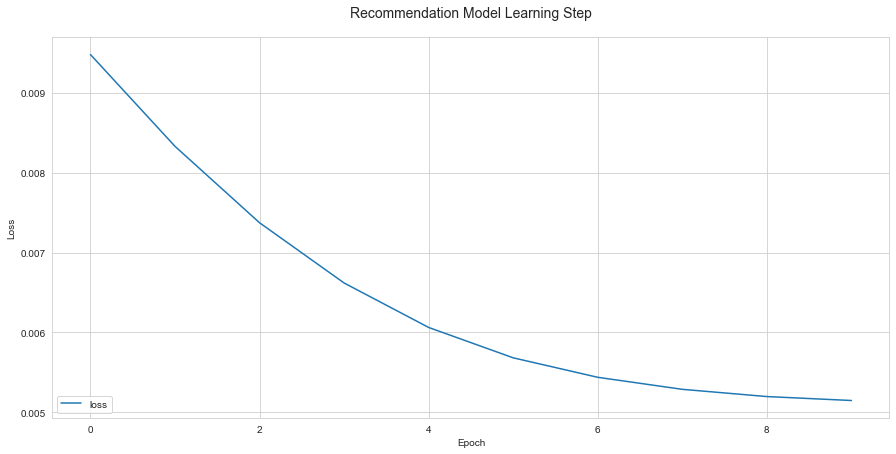

In [49]:
plt.plot(history.history['loss'])
plt.title('Recommendation Model Learning Step', fontsize=14, pad=20)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss'], loc='lower left')
plt.show()

In [50]:
from sklearn.metrics.pairwise import cosine_similarity

plant_representation = model.predict(tfidf)
similarity_matrix = cosine_similarity(plant_representation, plant_representation)

9/9 [==============================] - 0s 5ms/step


In [51]:
import tensorflow as tf

test_data = 'high_temp too_dry low_rainfall lowland ngawi'
tfidf_matrix = vectorizer.transform([test_data])
tfidf = tfidf_matrix.toarray()
test_representation = model.predict(tfidf)
similar_plants = cosine_similarity(test_representation, plant_representation)


# test_sequences = tokenizer.texts_to_sequences([test_data])
# test_sequences = pad_sequences(test_sequences, maxlen=maxlen, padding='post', truncating='post')
# test_representation = model.predict(test_sequences)
# similar_plants = cosine_similarity(test_representation, plant_representation)
recommended_plant_index = tf.argmax(similar_plants)
recommended_plant = final_df.iloc[recommended_plant_index]['plant_clean'].drop_duplicates()
recommended_plant
# print('Plant recommendation based on input:', ''.join(recommended_plant.values).split())

1/1 [==============================] - 0s 336ms/step


0    cabai bawang-merah
Name: plant_clean, dtype: object